<a href="https://colab.research.google.com/github/mclarafreitas/Reconhecimento-Facial/blob/main/Reconhecimento_Facial_Final1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd

caminho = '/content/drive/MyDrive/Images' # Substitua pelo caminho que você copiou anteriormente


In [60]:
import cv2 as cv

import os

  # Substitua pelo caminho do diretório que você deseja listar

# Percorre todos os arquivos e subdiretórios do diretório especificado
for pasta_raiz, sub_pastas, arquivos in os.walk(caminho):
    for arquivo in arquivos:
        caminho_completo = os.path.join(pasta_raiz, arquivo)
        print(caminho_completo)

/content/drive/MyDrive/Images/1.jpg
/content/drive/MyDrive/Images/2.png
/content/drive/MyDrive/Images/3.jpeg


In [61]:

imagem = cv.imread('/content/drive/MyDrive/Images/3.jpeg')


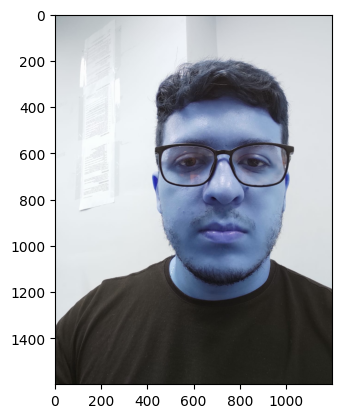

In [62]:
import cv2
from matplotlib import pyplot as plt

caminho = ('/content/drive/MyDrive/Images/3.jpeg')

plt.imshow(imagem)
#plt.axis('off')  # Opcional: desabilita os eixos
plt.show()




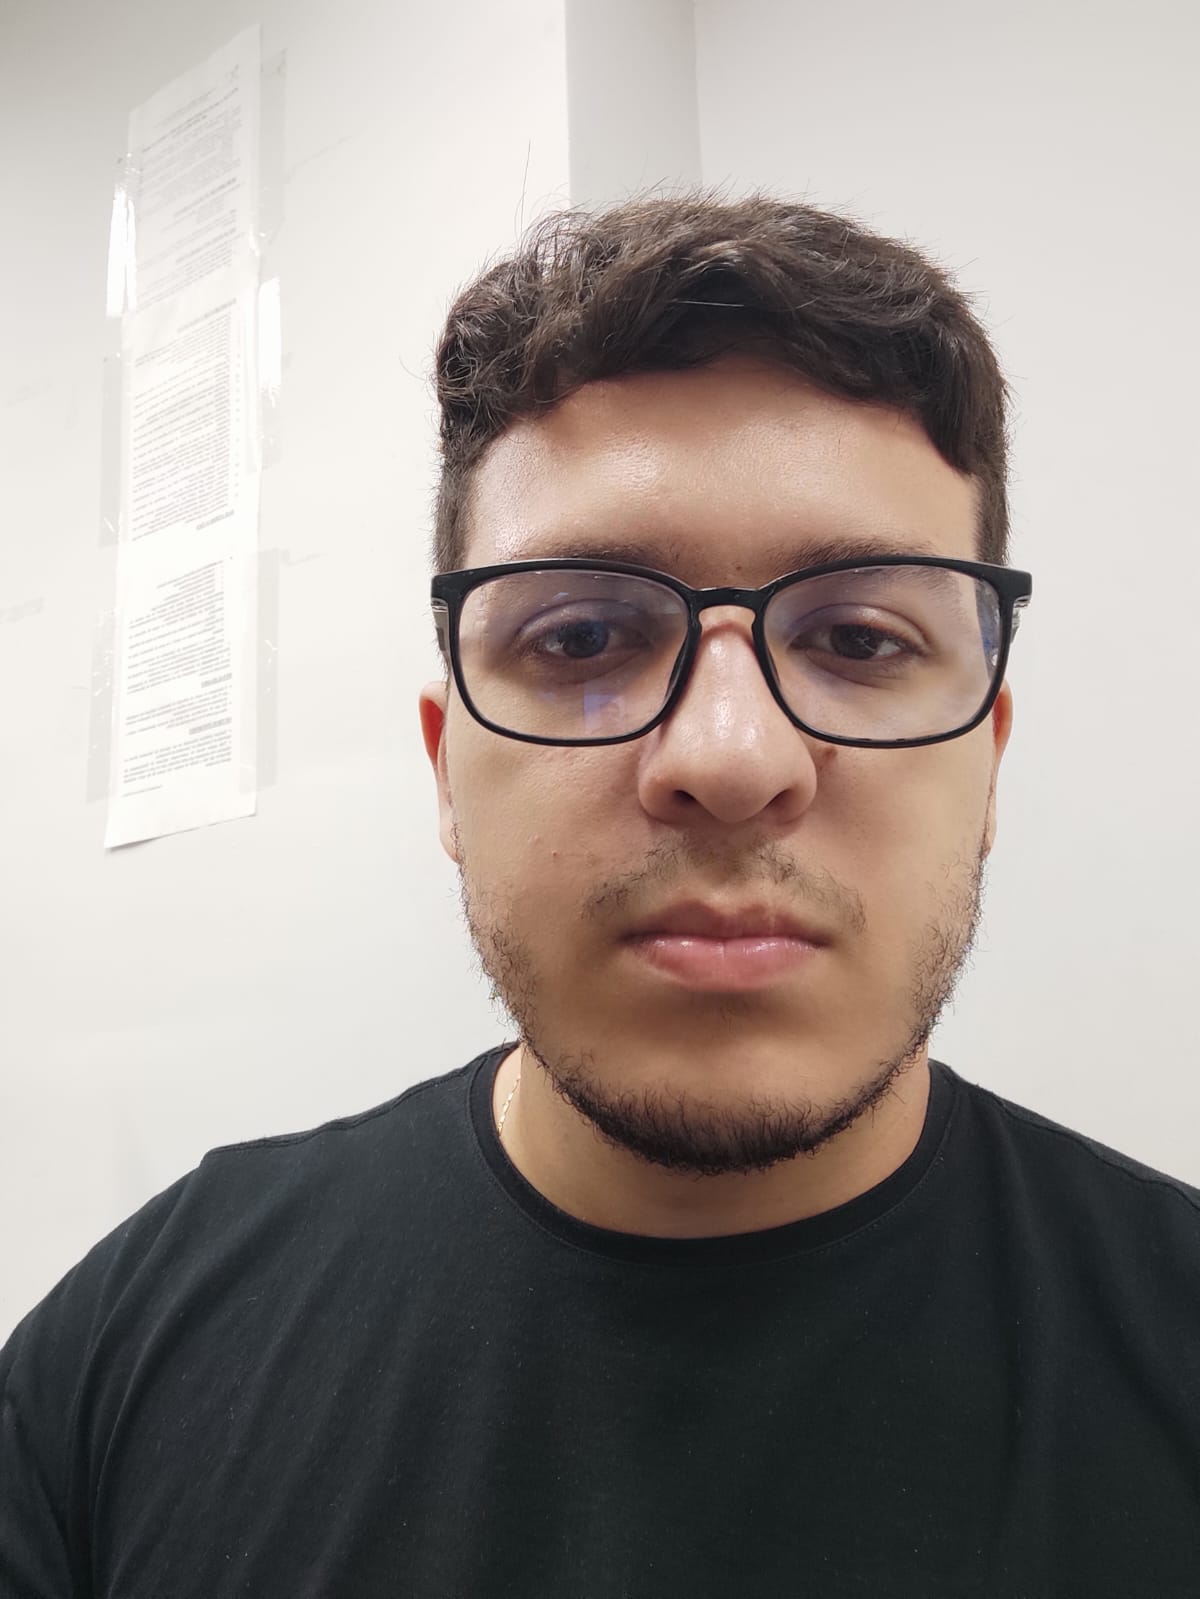

In [63]:
import cv2
from google.colab.patches import cv2_imshow

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR)
cv2_imshow(imagem)

In [64]:
import glob

diretorio = '/caminho/do/diretorio'  # Substitua pelo caminho do diretório que você deseja listar

padrao_arquivos = os.path.join(diretorio, '*')  # Padrão de busca para todos os arquivos

# Lista todos os arquivos que correspondem ao padrão especificado
arquivos = glob.glob(padrao_arquivos)

# Imprime o caminho completo de cada arquivo
for arquivo in arquivos:
    print(arquivo)


In [65]:
import cv2 as cv
import shutil

caminho = ['/content/drive/MyDrive/Images/3.jpeg']

centroides_lista = []

for i, img in enumerate(caminho):
    imagem = cv.imread(caminho[i], 0)
    ret, limiar = cv.threshold(imagem, 127, 255, 0)
    contornos, _ = cv.findContours(limiar, 1, 3)

    if len(contornos) > 0:
        # Pegando o primeiro contorno
        contorno = contornos[0]

        momento = cv.moments(contorno)
        if momento['m00'] != 0:
            cx = momento['m10'] / momento['m00']
            cy = momento['m01'] / momento['m00']

            centroide = f'{cx}, {cy}'
            centroides_lista.append(centroide)
        else:
            # Contorno com área zero
            centroides_lista.append('Contorno com área zero')
    else:
        # Nenhum contorno encontrado
        centroides_lista.append('Nenhum contorno encontrado')

print(centroides_lista)


['Contorno com área zero']


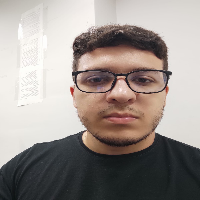

In [66]:
from google.colab.patches import cv2_imshow
import cv2 as cv

# Carregando a imagem
imagem = cv.imread('/content/drive/MyDrive/Images/3.jpeg')

# Especificando a nova largura e altura
nova_largura = 200
nova_altura = 200

# Redimensionando a imagem
imagem_redimensionada = cv.resize(imagem, (nova_largura, nova_altura))

# Exibindo a imagem redimensionada
cv2_imshow(imagem_redimensionada)


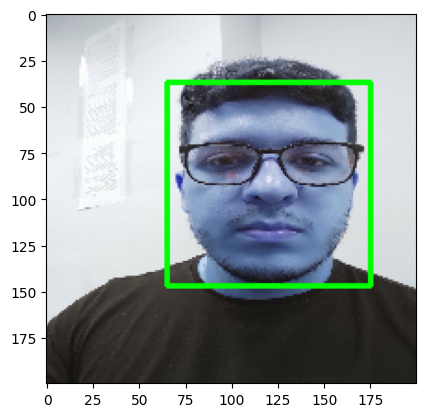

In [67]:

import cv2 as cv
import matplotlib.pyplot as plt


# Carregar o classificador pré-treinado
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Carregar a imagem
imagem = imagem_redimensionada



if imagem is not None:
    # Converter para escala de cinza
    gray = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)

    # Realizar a detecção de faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Desenhar retângulos ao redor das faces detectadas
    for (x, y, w, h) in faces:
        cv.rectangle(imagem, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Exibir a imagem com as faces detectadas
    plt.imshow(imagem)
else:
    print("Erro ao carregar a imagem.")

